# Unsupervised Learning on Human Humor Ratings

## 1. Introduction

In a world where laughter is subjective and humor varies wildly across individuals, understanding what makes people laugh presents a fascinating data science challenge. This project explores the patterns hidden in human humor preferences using the Jester Joke Ratings dataset, which contains joke ratings from thousands of users across 100 jokes. By applying dimensionality reduction techniques like PCA, t-SNE, and SVD, we compress high-dimensional rating data into visualizable formats. These reduced representations are then clustered using algorithms such as K-Means, DBSCAN, and Hierarchical Clustering to group users with similar joke preferences. The goal is to uncover natural humor taste segments, visualize them, and interpret what defines each group — such as users who enjoy sarcasm, prefer clean jokes, or rate harshly. Through this unsupervised learning pipeline, we aim to not only analyze how people respond to humor but also demonstrate the power of clustering and dimensionality reduction in discovering human behavior patterns from data.

## 2. Dataset Description: The Jester Joke Ratings Dataset

The Jester dataset is a well-known benchmark in recommender systems and collaborative filtering research. It contains over 4.1 million joke ratings collected from more than 73,000 users who rated up to 100 jokes on a scale from –10 (dislike) to +10 (like).

The full dataset is distributed as three separate files:
* jester_dataset_1_1.xls
* jester_dataset_1_2.xls
* jester_dataset_1_3.xls

These files can be combined into one complete dataset where:
* Each row represents a unique user.
* The first column indicates how many jokes that user rated.
* The next 100 columns correspond to their ratings for each joke (or a placeholder value of 99 indicating a missing/unrated joke).

Link to the Dataset: https://eigentaste.berkeley.edu/dataset/

The large number of sparsity in the dataset makes it difficult to work with so we are reducing the dataset to 3500 rows and 100 columns.

## 2. Data Cleaning



In [2]:
%pip install xlrd

  Using cached xlrd-2.0.2-py2.py3-none-any.whl.metadata (3.5 kB)
Using cached xlrd-2.0.2-py2.py3-none-any.whl (96 kB)
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
# Read the Excel files and set column names from 0 to 100
col_names = list(range(101))
df1 = pd.read_excel('jester-data-1.xls', header=None, names=col_names)
df2 = pd.read_excel('jester-data-2.xls', header=None, names=col_names)
df3 = pd.read_excel('jester-data-3.xls', header=None, names=col_names)

In [12]:
df1.shape

(24983, 101)

In [13]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [14]:
df2.shape

(23500, 101)

In [15]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,50,99.00,8.11,99.00,99.0,-2.28,-4.22,5.49,-2.62,99.00,...,99.00,99.0,99.00,99.00,99.00,-5.92,99.0,99.00,99.00,99.00
1,100,-4.37,-3.88,0.73,-3.2,-6.41,1.17,7.82,-4.76,-6.41,...,5.73,-6.7,1.99,2.62,-0.49,3.45,3.2,-0.53,-0.53,-2.96
2,42,99.00,99.00,99.00,99.0,0.73,99.00,5.53,3.25,99.00,...,99.00,99.0,99.00,99.00,3.16,99.00,99.0,99.00,99.00,99.00
3,65,0.34,-6.55,2.86,99.0,-3.64,1.12,5.34,2.33,99.00,...,99.00,99.0,99.00,99.00,99.00,99.00,99.0,99.00,99.00,99.00
4,37,99.00,99.00,99.00,99.0,9.13,99.00,-9.32,-2.04,99.00,...,99.00,99.0,99.00,99.00,99.00,99.00,99.0,99.00,99.00,99.00


In [9]:
df3.shape

(24937, 101)

In [16]:
df3.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,26,99.0,99.00,99.0,99.0,-1.65,99.0,-0.78,6.89,99.0,...,99.0,99.0,99.00,99.0,99.00,99.0,99.0,99.0,99.00,99.0
1,33,99.0,99.00,99.0,99.0,-9.27,99.0,-9.17,-8.59,99.0,...,99.0,99.0,-2.77,99.0,99.00,99.0,99.0,99.0,99.00,99.0
2,16,99.0,99.00,99.0,99.0,-6.12,99.0,-7.48,-7.77,99.0,...,99.0,99.0,99.00,99.0,99.00,99.0,99.0,99.0,99.00,99.0
3,24,99.0,0.05,99.0,99.0,-2.82,99.0,-4.85,-0.87,99.0,...,99.0,99.0,99.00,99.0,1.84,99.0,99.0,99.0,-4.08,99.0
4,22,99.0,99.00,99.0,99.0,-4.95,99.0,6.21,2.72,99.0,...,99.0,99.0,99.00,99.0,99.00,99.0,99.0,99.0,99.00,99.0


In [17]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df.shape

(73421, 101)

In [18]:
df = df[df[0] == 100].reset_index(drop=True)
df.shape

(14116, 101)

In [19]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
1,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
2,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
3,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
4,100,1.31,1.80,2.57,-2.38,0.73,0.73,-0.97,5.00,-7.23,...,1.46,1.70,0.29,-3.30,3.45,5.44,4.08,2.48,4.51,4.66


In [20]:
df = df.drop(columns=0).sample(n=3500, random_state=42).reset_index(drop=True)
df.shape

(3500, 100)

In [21]:
df.to_csv('resampled_dataset.csv', index=False)

In [3]:
import pandas as pd

In [4]:
# The new resampled dataset
df = pd.read_csv('resampled_dataset.csv')

In [5]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,3.35,5.24,5.15,5.29,4.61,-7.43,1.31,4.37,4.71,8.74,...,8.30,-5.63,8.20,8.25,5.53,8.45,8.59,8.11,6.75,7.38
1,4.66,1.99,4.51,1.99,-3.40,-1.50,1.07,3.11,5.39,2.04,...,-0.29,2.96,4.42,7.09,4.76,-4.51,0.39,4.71,-0.19,4.95
2,-5.58,0.00,-5.29,-8.69,2.14,-5.10,-5.63,-2.38,-6.70,-1.26,...,-4.32,-2.77,1.31,1.94,0.83,1.02,-0.63,-2.18,-1.46,-0.83
3,5.49,5.29,8.74,7.77,2.67,8.54,7.33,3.93,5.63,4.37,...,0.68,8.88,8.83,9.03,9.13,8.79,0.24,-0.53,2.04,-0.15
4,7.04,8.74,9.08,7.82,8.11,8.20,7.72,1.55,7.14,5.05,...,-5.68,3.74,9.17,3.40,-7.28,9.27,9.27,9.27,4.37,8.98


## 3. Data Visualisation

**A. Rating Distribution**

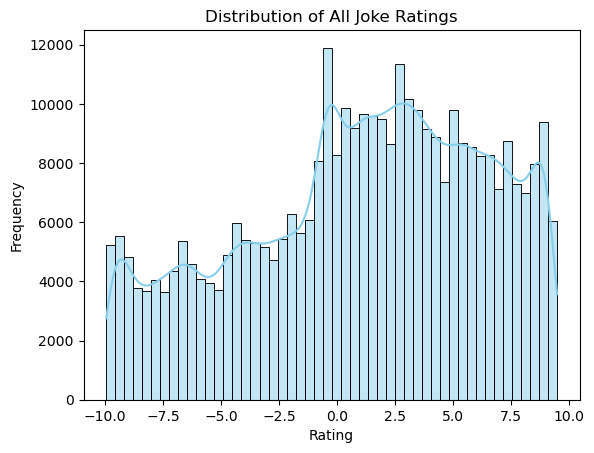

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

ratings_flat = df.values.flatten()  
sns.histplot(ratings_flat, bins=50, kde=True, color='skyblue')
plt.title("Distribution of All Joke Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

**B. Average Rating per User**

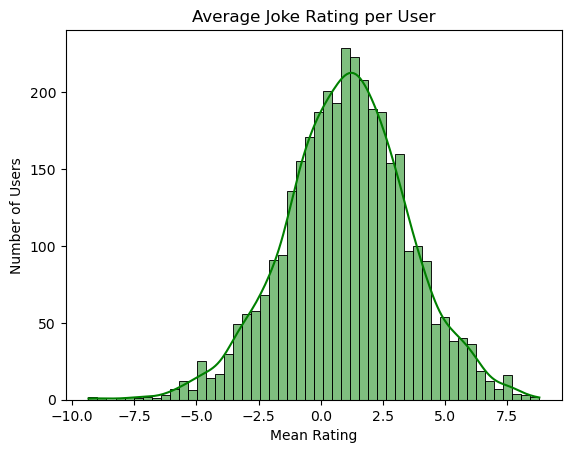

In [7]:
user_means = df.mean(axis=1)
sns.histplot(user_means, bins=50, kde=True, color='green')
plt.title("Average Joke Rating per User")
plt.xlabel("Mean Rating")
plt.ylabel("Number of Users")
plt.show()

## 4. Data Modeling

We are going to try combinations of dimensionality reduction techniques with clustering alogirithms.

#### 1. PCA (Principle Component Analysis) with K-Means Clustering

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Step 1: Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Step 2: PCA
pca_kmeans = PCA(n_components=2)
X_pca = pca_kmeans.fit_transform(X_scaled)

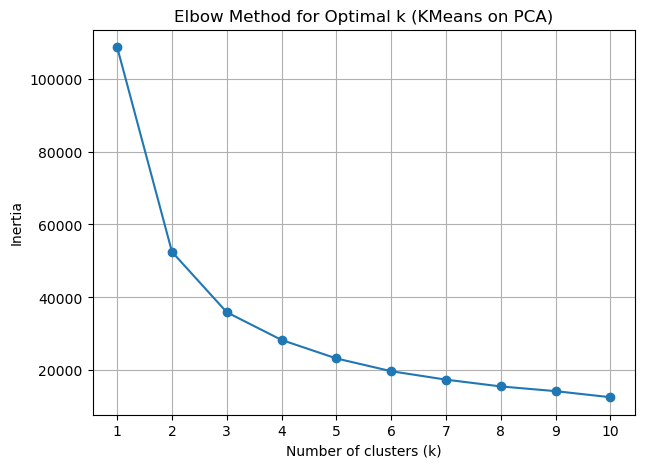

In [9]:
# Step 3: Elbow Method
from sklearn.cluster import KMeans
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k (KMeans on PCA)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid(True)
plt.show()

Here, we have chosen 5 as the no. of clusters. 

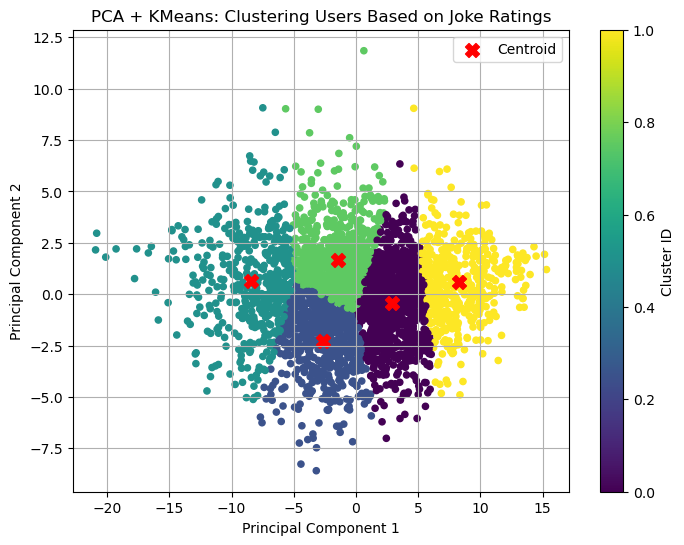

In [10]:
# Step 4: Kmeans
kmeans = KMeans(n_clusters=5, random_state=42)
labels_kmeans = kmeans.fit_predict(X_pca)

# Step 5: Plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, s=20)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=100, marker='X', label='Centroid')
plt.title("PCA + KMeans: Clustering Users Based on Joke Ratings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.colorbar(label='Cluster ID')
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import silhouette_score

# Step 6: Evaluation
score_pca_kmeans = silhouette_score(X_pca, labels_kmeans)
print(f"Silhouette Score for KMeans (PCA): {score_pca_kmeans:.4f}")

Silhouette Score for KMeans (PCA): 0.3393


#### 2. PCA (Principle Component Analysis) with Hierarchical Clustering

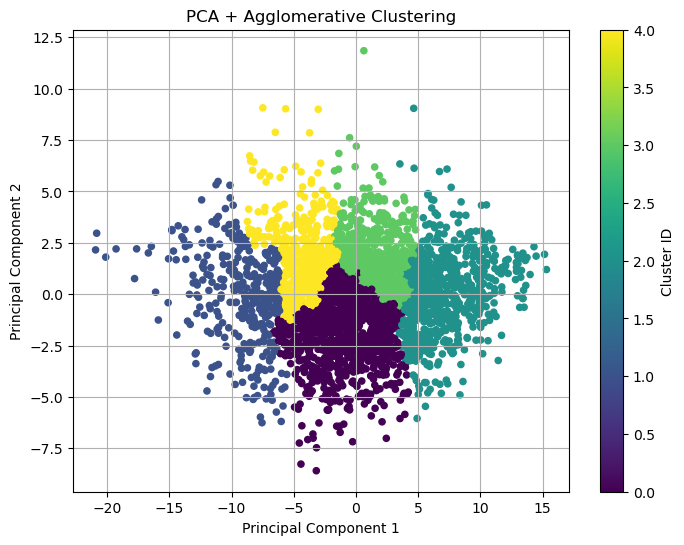

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Step 1: Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns='cluster', errors='ignore'))

# Step 2: PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels_agglo = agglo.fit_predict(X_pca)

# Step 4: Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_agglo,  s=20)
plt.title("PCA + Agglomerative Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.colorbar(label="Cluster ID")
plt.show()


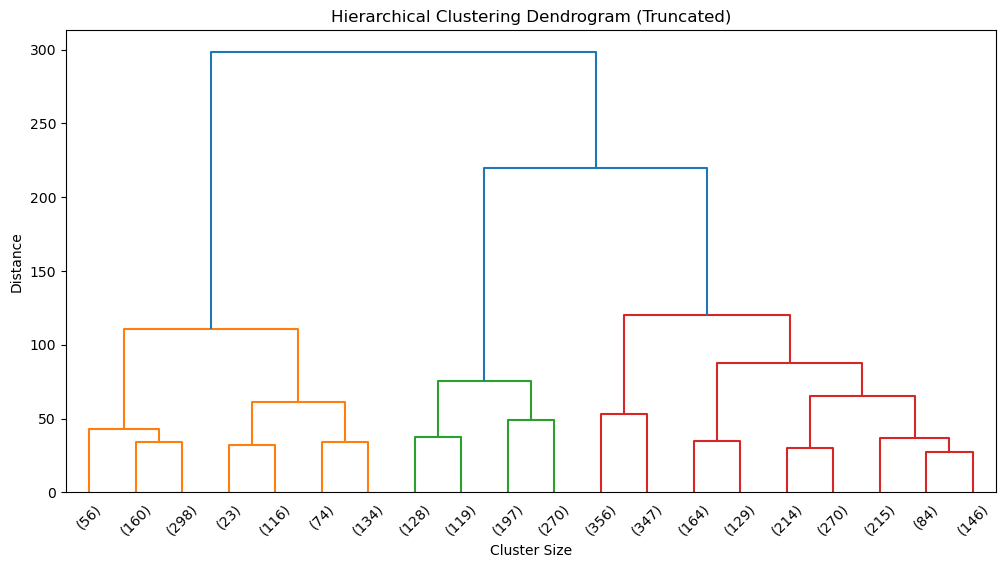

In [13]:
# Step 5: Plot the dendogram
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X_pca, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=20, leaf_rotation=45., leaf_font_size=10.)
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [14]:
# Step 6: Evaluation
score_pca_agg = silhouette_score(X_pca, labels_agglo)
print(f"Silhouette Score for Agglomerative Clustering (PCA): {score_pca_agg:.4f}")

Silhouette Score for Agglomerative Clustering (PCA): 0.2749


#### 3. PCA (Principle Component Analysis) with DBSCAN Clustering

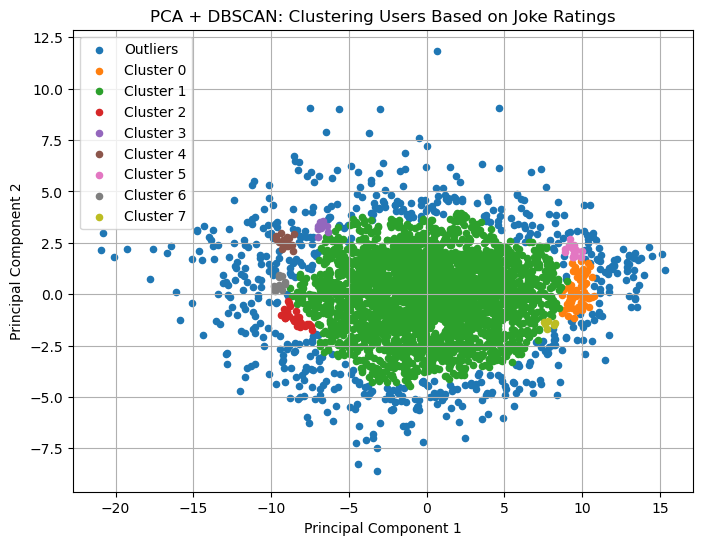

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['cluster', 'cluster_agg'], errors='ignore'))

# Step 2: PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
labels_dbscan = dbscan.fit_predict(X_pca)

# DBSCAN labels: -1 = noise
unique_labels = np.unique(labels_dbscan)

# Step 4: Plot
plt.figure(figsize=(8,6))
for label in unique_labels:
    mask = labels_dbscan == label
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=f'Cluster {label}' if label != -1 else 'Outliers', s=20)

plt.title("PCA + DBSCAN: Clustering Users Based on Joke Ratings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

We can clearly see that DBSCAN for this dataset gives the worst output so we won't be using it for further trials. 

#### 4. t-SNE with K-Means Clustering

/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


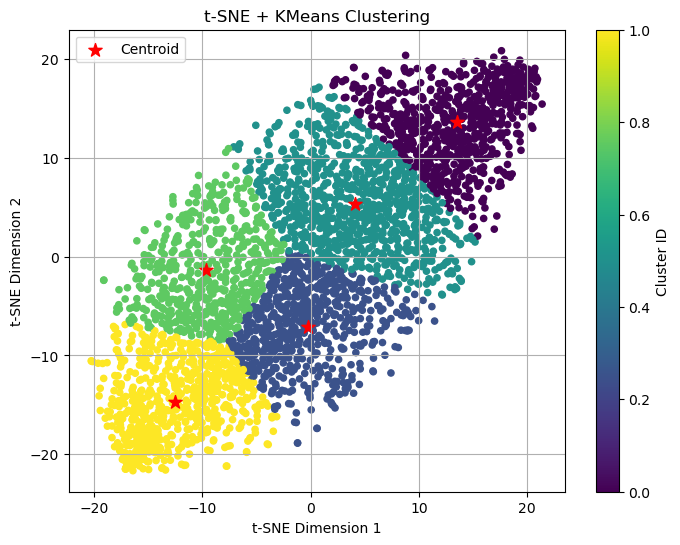

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Step 1: Standardize 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['cluster', 'cluster_agg', 'cluster_dbscan'], errors='ignore'))

# Step 2: t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Step 3: KMeans
kmeans_tsne = KMeans(n_clusters=5, random_state=42)
labels_tsne = kmeans_tsne.fit_predict(X_tsne)

# Step 4: Plot
# Plotting the clustered data with centroids
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_tsne, s=20)
plt.scatter(kmeans_tsne.cluster_centers_[:, 0], kmeans_tsne.cluster_centers_[:, 1], 
            marker="*", c="red", linewidth=1, s=100, label = "Centroid")
plt.title("t-SNE + KMeans Clustering")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.colorbar(label='Cluster ID')
plt.legend()
plt.show()

In [21]:
# Step 5: Evaluation
score_tsne_kmeans = silhouette_score(X_tsne, labels_tsne)
print(f"Silhouette Score for KMeans (t-SNE): {score_tsne_kmeans:.4f}")

Silhouette Score for KMeans (t-SNE): 0.3779


#### 5. t-SNE with Hierarchical Clustering

/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


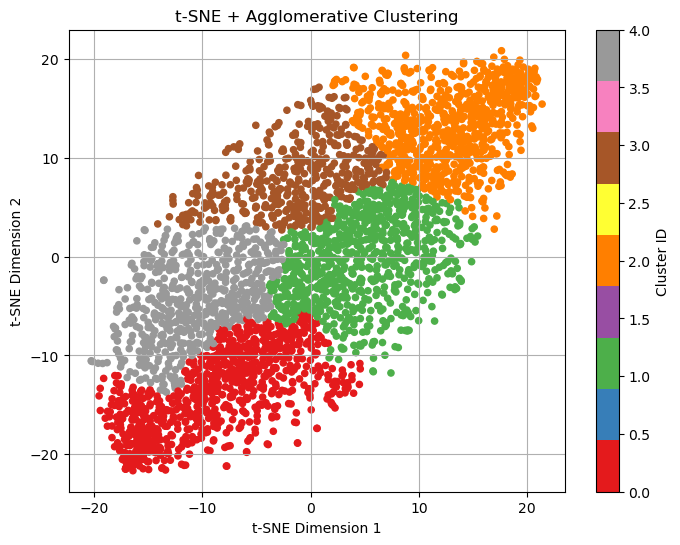

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering

X = df.drop(columns=['cluster', 'cluster_agg', 'cluster_dbscan', 'cluster_tsne'], errors='ignore')

# Step 1: Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Step 3: Agglomerative Clustering
agg_tsne = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels_agg_tsne = agg_tsne.fit_predict(X_tsne)

# Step 4: Plot
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_agg_tsne, cmap='Set1', s=20)
plt.title("t-SNE + Agglomerative Clustering")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.colorbar(label="Cluster ID")
plt.show()

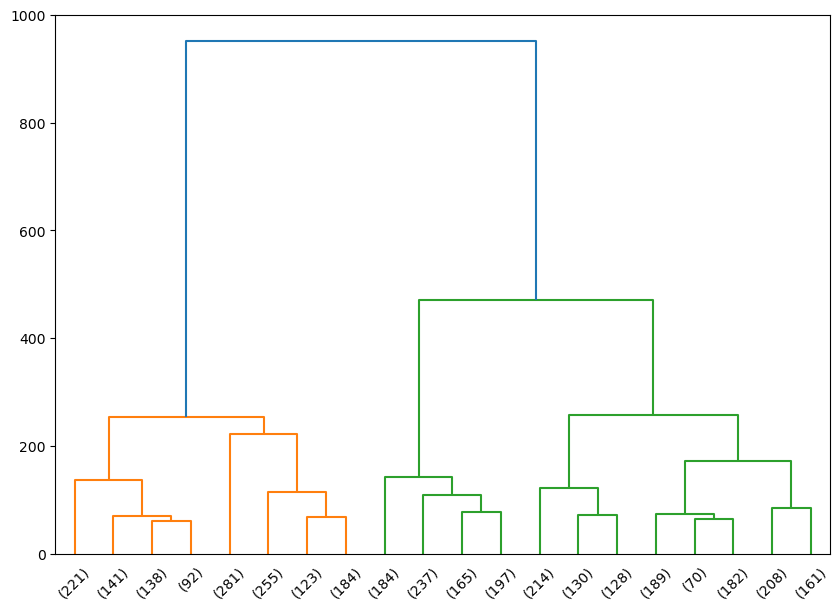

In [23]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 5: Dendograms
linked = linkage(X_tsne, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked ,truncate_mode='lastp', p=20, leaf_rotation=45., leaf_font_size=10.)
plt.show()


In [24]:
# Step 6: Evaluation
score_tsne_agg = silhouette_score(X_tsne, labels_agg_tsne)
print(f"Silhouette Score for Hierarchical Clustering (t-SNE): {score_tsne_agg:.4f}")

Silhouette Score for Hierarchical Clustering (t-SNE): 0.3417


#### 6. SVD (Singular Value Decomposition) with K-means

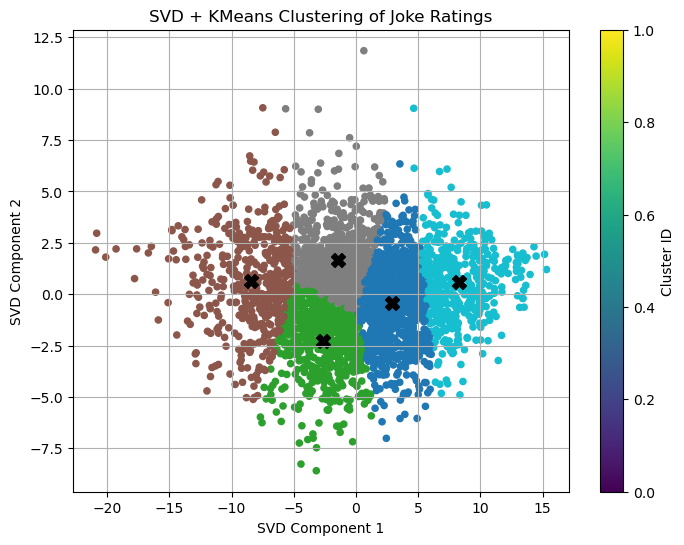

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

X = df

# Step 1: Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: SVD
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X_scaled)

# Step 3: K-Means
kmeans_svd = KMeans(n_clusters=5, random_state=42)  # Try k=3 based on earlier elbow
labels_svd = kmeans_svd.fit_predict(X_svd)

# Step 4: Plot
plt.figure(figsize=(8,6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=labels_svd, cmap='tab10', s=20)
plt.scatter(kmeans_svd.cluster_centers_[:, 0], kmeans_svd.cluster_centers_[:, 1], c='black', s=100, marker='X')
plt.title("SVD + KMeans Clustering of Joke Ratings")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.colorbar(label="Cluster ID")
plt.grid(True)
plt.show()

In [27]:
# Step 5: Evaluation
score_svd_kmeans = silhouette_score(X_svd, labels_svd)
print(f"Silhouette Score for K-Means (SVD): {score_svd_kmeans:.4f}")

Silhouette Score for K-Means (SVD): 0.3393


#### 7. SVD (Singular Value Decomposition) with Hierarchical Clustering

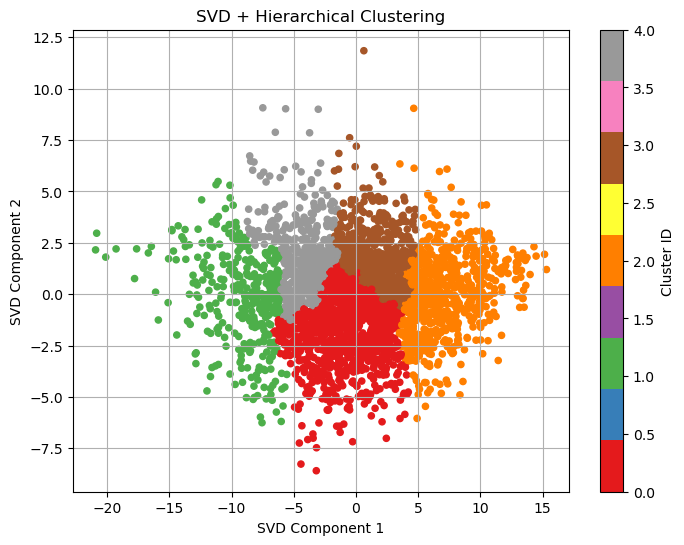

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import AgglomerativeClustering

X = df

# Step 1: Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: SVD
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X_scaled)

# Step 3: Agglomerative Clustering
agglo_svd = AgglomerativeClustering(n_clusters=5, linkage='ward') 
labels_agg_svd = agglo_svd.fit_predict(X_svd)

# Step 4: Plot
plt.figure(figsize=(8,6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=labels_agg_svd, cmap='Set1', s=20)
plt.title("SVD + Hierarchical Clustering")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.grid(True)
plt.colorbar(label='Cluster ID')
plt.show()

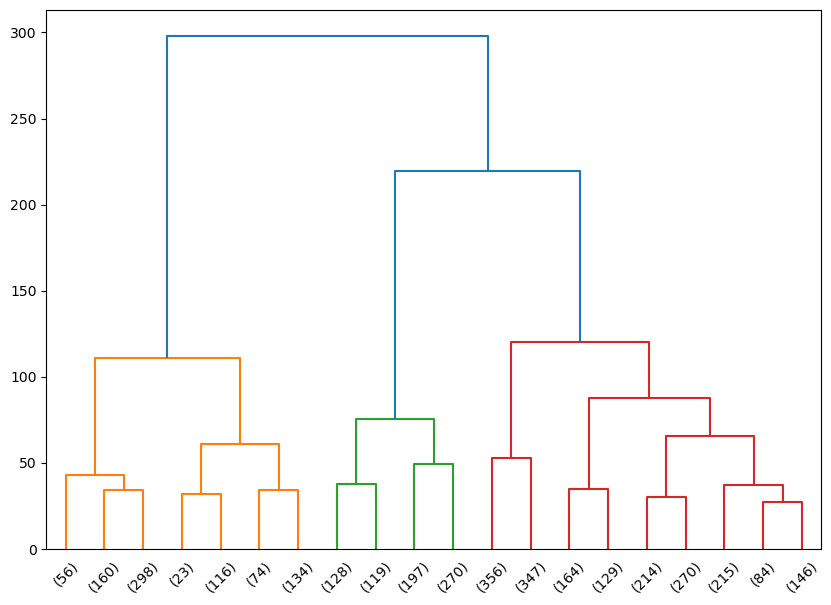

In [30]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X_svd, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=20, leaf_rotation=45., leaf_font_size=10.)
plt.show()


In [31]:
# Step 5: Evaluation
score_svd_agg = silhouette_score(X_svd, labels_agg_svd)
print(f"Silhouette Score for Hierarchical Clustering (SVD): {score_svd_agg:.4f}")

Silhouette Score for Hierarchical Clustering (SVD): 0.2749


## 5. Model Evaluation

We are doing model evaluation by comparing the silhouette scores of each combination. 

In [56]:
combinations = [
    "PCA + KMeans",
    "PCA + Agglomerative Clustering",
    "t-SNE + KMeans",
    "t-SNE + Agglomerative Clustering",
    "SVD + KMeans",
    "SVD + Agglomerative Clustering"
]

silhouette_scores = [
    score_pca_kmeans,
    score_pca_agg,
    score_tsne_kmeans,
    score_tsne_agg,
    score_svd_kmeans,
    score_svd_agg
]

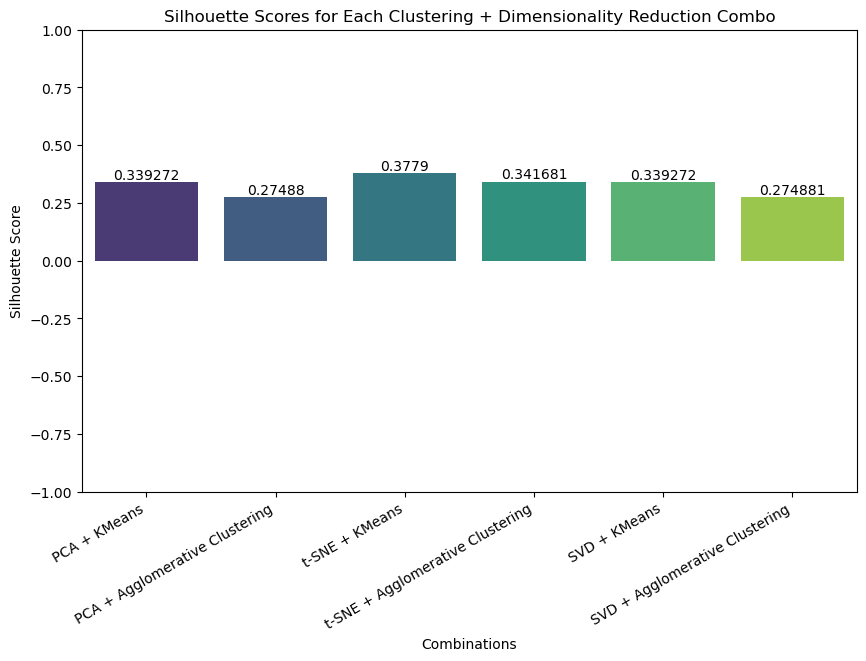

In [63]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=combinations, y=silhouette_scores, hue=combinations, palette='viridis', legend=False)
for container in ax.containers:
    ax.bar_label(container)
plt.ylim(-1, 1)
plt.ylabel("Silhouette Score")
plt.xlabel("Combinations")
plt.title("Silhouette Scores for Each Clustering + Dimensionality Reduction Combo")
plt.xticks(rotation=30, ha='right')
plt.show()

The comparison shows that the t-SNE + K-Means Comibination has the highest score thus concluding that it has clustered the reviewers on some similarity. 

## 6. Model Interpretation

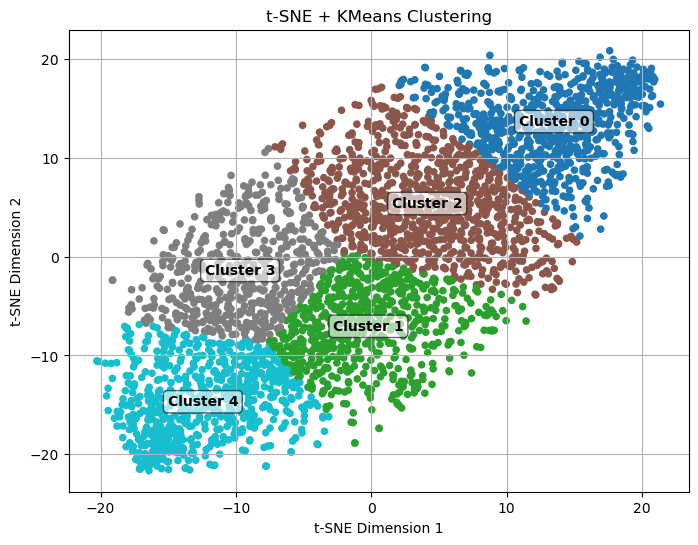

In [69]:
import numpy as np

plt.figure(figsize=(8, 6))

# Plot clusters with colors
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_tsne, cmap='tab10', s=20)

for cluster_id in np.unique(labels_tsne):
    cluster_points = X_tsne[labels_tsne == cluster_id]
    center = cluster_points.mean(axis=0)
    plt.text(center[0], center[1], f"Cluster {cluster_id}", 
             fontsize=10, weight='bold', ha='center', va='center', color='black',
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='black', boxstyle='round'))

plt.title("t-SNE + KMeans Clustering")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()

### Possible Interpretation of the Clusters

**Cluster 0:** Users who enjoy all kinds of jokes (high ratings across the board)

**Cluster 1:** Users who rate harshly or negatively (critical or humor-averse)

**Cluster 2:** Fans of dark, edgy, or sarcastic humor (high ratings on controversial jokes)

**Cluster 3:** Users who like clean, light-hearted humor

**Cluster 4:** Selective raters who like only a few specific joke types (e.g., puns or wordplay)
